## Solving times

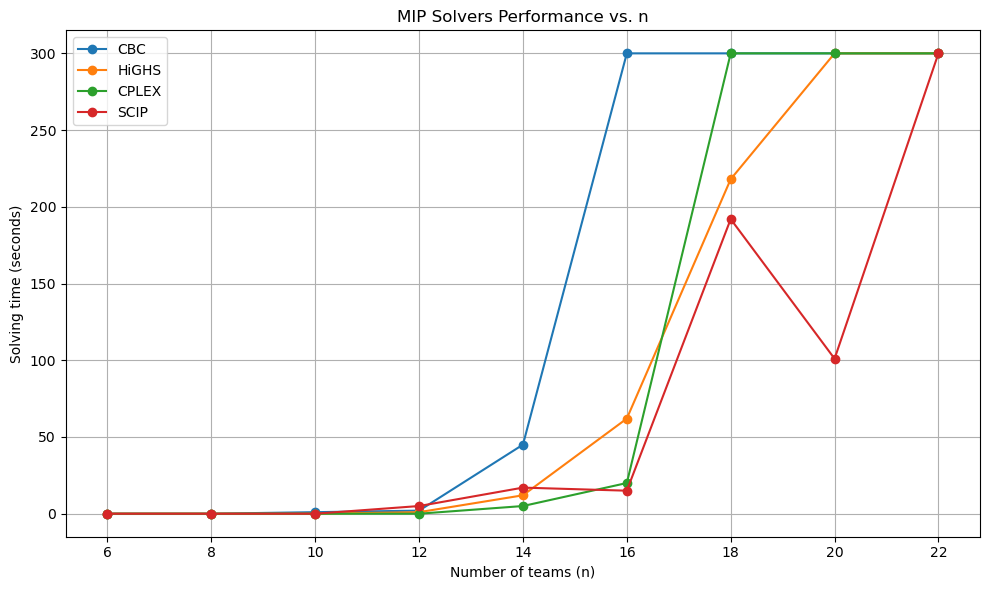

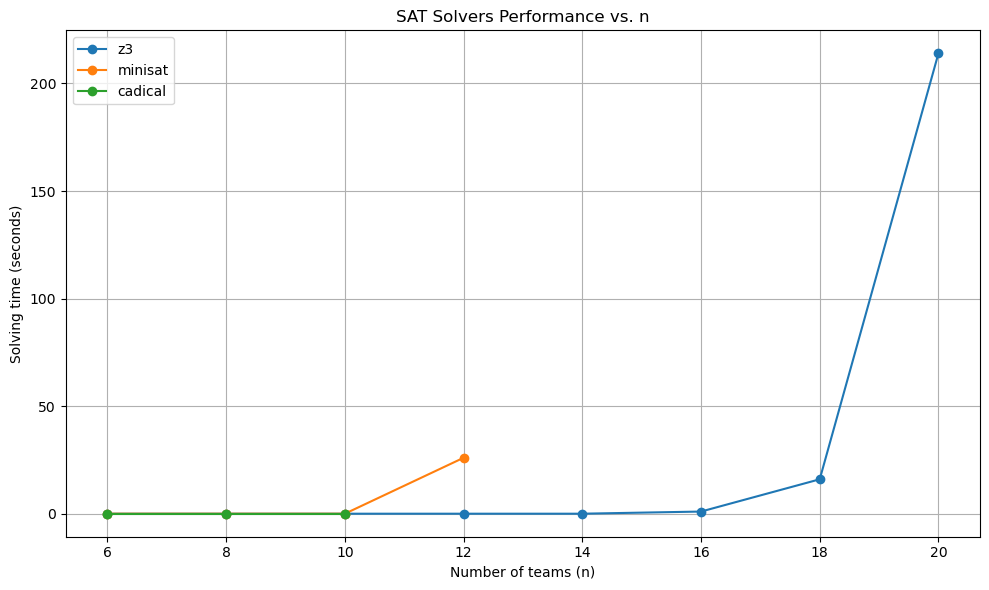

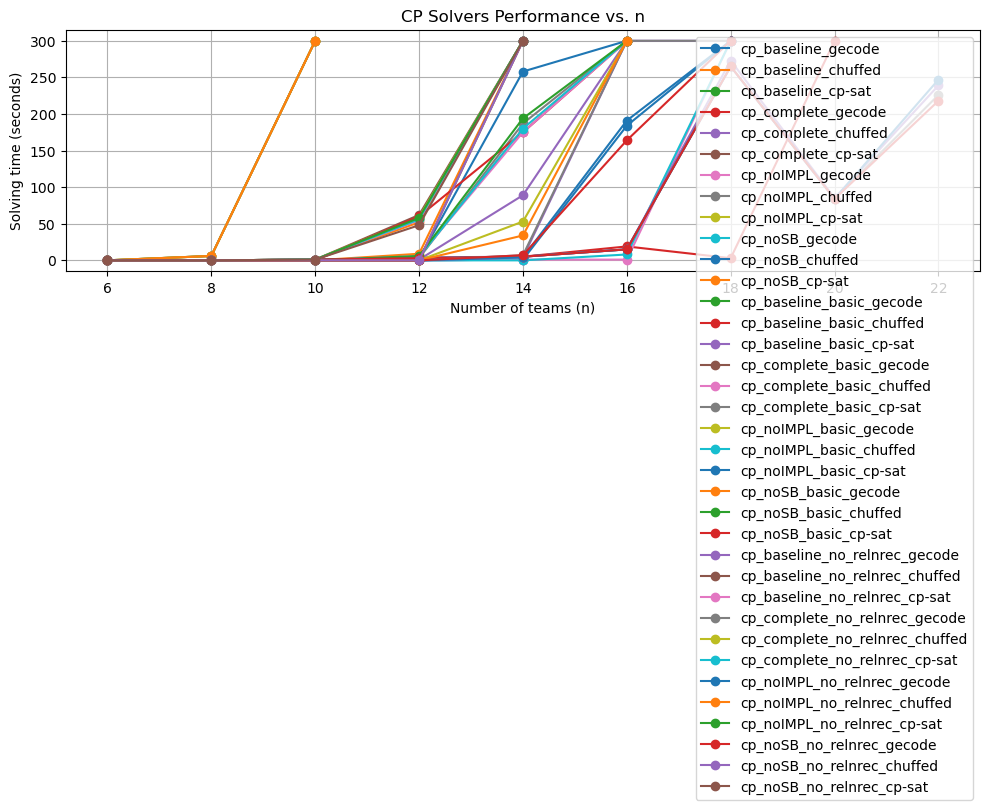

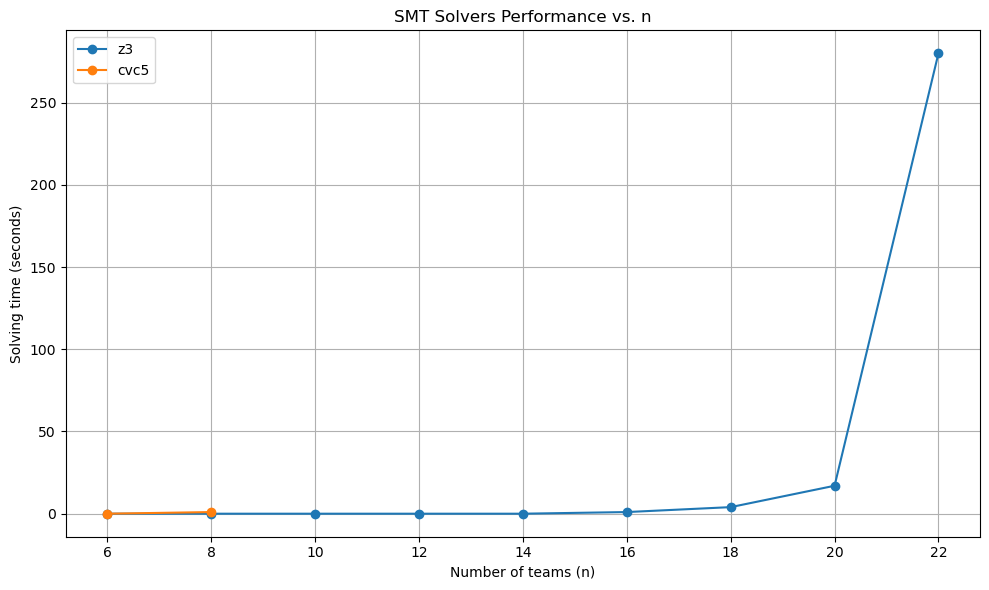

In [4]:
import os
import json
import matplotlib.pyplot as plt

base_folder = "res/"

for technique in os.listdir(base_folder):
    technique_folder = os.path.join(base_folder, technique)
    if not os.path.isdir(technique_folder):
        continue

    solver_data = {}

    for filename in os.listdir(technique_folder):
        if filename.endswith(".json"):
            n = int(filename.split('.')[0])
            filepath = os.path.join(technique_folder, filename)
            with open(filepath, 'r') as f:
                data = json.load(f)
                for solver, result in data.items():
                    time = result['time']
                    if solver not in solver_data:
                        solver_data[solver] = {'n': [], 'time': []}
                    solver_data[solver]['n'].append(n)
                    if time < 300:
                        solver_data[solver]['time'].append(time)
                    else:
                        solver_data[solver]["time"].append(300)

    plt.figure(figsize=(10, 6))
    for solver, values in solver_data.items():
        sorted_pairs = sorted(zip(values['n'], values['time']))
        sorted_n, sorted_time = zip(*sorted_pairs)
        plt.plot(sorted_n, sorted_time, marker='o', label=solver)

    plt.xlabel("Number of teams (n)")
    plt.ylabel("Solving time (seconds)")
    plt.title(f"{technique} Solvers Performance vs. n")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"img/{technique}-result.png")
    plt.show()


## Presolving times

In [2]:
import time

N = 22 # maximum number of teams where a solution is found

print("#teams: TIME[s]")
for n in range(6, N+1, 2):
    teams = range(n)  # Team identifiers
    weeks = range(n - 1)  # Week identifiers
    periods = range(n // 2)  # Period identifiers

    start_time = time.time() # start timer
    # Round robin schedule generation
    rb = []
    for p in periods:
        matches = []
        for w in weeks:
            if p == 0:
                matches.append([n - 1, w])
            else:
                matches.append([(p + w) % (n - 1), (n - p + w - 1) % (n - 1)])
        rb.append(matches)
    elapsed_time = time.time() - start_time # stop timer
    
    print(f"{n}: {int(elapsed_time)}s")

#teams: TIME[s]
6: 0s
8: 0s
10: 0s
12: 0s
14: 0s
16: 0s
18: 0s
20: 0s
22: 0s
